# Загрузка

In [177]:
!python --version
!pip install pandas matplotlib -q
!pip install ipympl -q

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib', matplotlib.__version__)

import ipywidgets
print('ipywidgets', ipywidgets.__version__)
%matplotlib ipympl

import functools
import operator

from typing import *

import pprint
import collections

import json
print('json', json.__version__)

Python 3.11.4
numpy 1.25.2
pandas 2.0.3
matplotlib 3.7.2
ipywidgets 8.1.0
json 2.0.9


## Используемые типы

In [178]:
# Множество номеров текстов:
IText = Union[int, Iterable[int]]

# Множество номеров терминов:
ITermId = Union[int, Iterable[int]]

# Словарь для предрасчитанных строк из g_deltas. Ключ -- номер текста.
# Если None -- будет использована функция get_delta_row():
IDeltaSource = Optional[Dict[int, np.ndarray]]

# Словарь для набора множеств из множеств номеров терминов.
# См. terms_view(...):
IThesaurusView = Dict[Any, Iterable[int]]

## Таблица $\Delta_{lij}$

In [179]:
_deltas_df: pd.DataFrame = pd.\
        read_csv('./termwise_prnd_deltas.csv', dtype=np.int32).\
        sort_index().\
        to_numpy()
# g_deltas = _deltas_df[_g_deltas_df]
g_deltas = _deltas_df[:, 1:]
g_deltas_l_index = _deltas_df[:, 0]

def get_delta_rows(
    a_l: IText,
    a_delta_source: IDeltaSource = None
) -> np.ndarray:
    """
    Возвращает словарь numpy-массивов со значениями дельт заданного текста a_l.
    Ключ -- номер текста. Дельта термина номер i лежит на i-й позиции массива.
    
    Если a_delta_source не равно None -- просто возвращает сам a_delta_source.
    """
    
    if isinstance(a_l, int):
        a_l = [a_l]
    elif not isinstance(a_l, collections.abc.Iterable):
        raise ValueError(f'В качестве a_l передано не int и не итерируемое: {a_l}')
    
    if a_delta_source is not None:
        return a_delta_source
    
    return {l: g_deltas[np.searchsorted(g_deltas_l_index, l)] for l in a_l}

In [180]:
_deltas_df

array([[  853,     0,     0, ...,     0,     0,     0],
       [  911,     0,     0, ...,     0,     0,     0],
       [  927,     0,     0, ...,     0,     0,     0],
       ...,
       [72691,     0,     0, ...,     0,     0,     0],
       [72698,     0,     0, ...,     0,     0,     0],
       [72701,     0,     0, ...,     0,     0,     0]], dtype=int32)

In [181]:
# Пример использования:
get_delta_rows(949)

{949: array([0, 0, 1, ..., 0, 0, 0], dtype=int32)}

## Авторы

In [182]:
g_persons_df = pd.read_csv('./db_persons.csv', index_col=1).sort_values(by=['Фамилия', 'Имя', 'Отчество'])
g_persons_df

,Unnamed: 0,Фамилия,Имя,Отчество,Организация,Аффилиации,Город
ID,,,,,,,
14788,10375,Быков,Алексей,Александрович,"МГУ им. Ломоносова Москва, Россия",NaN,Москва
31762,8912,Дубовенко,Светлана,В.,PMSoft,NaN,Москва
70614,574,Alam,Md Shamsher,-,Interactive Research and Development,NaN,Дакка
63616,2741,Allocati,Eleonora,-,Mario Negri Institute for Pharmacological Rese...,NaN,Milan
20406,9794,Ano,Katsunori,none,Shibaura Institute of Technology,NaN,Tokyo
...,...,...,...,...,...,...,...
10480,11978,Яцутко,Александра,Валерьевна,?,NaN,NaN
40264,7774,Ячимович,Милоица,Милоица,Университет Черногории,NaN,Подгорица
10631,12085,Яшин,А,И,?,NaN,NaN


In [183]:
g_persons_df[g_persons_df.index.isin({9705, 47611, 86, 168, 182, 210, 53736, 52220, 366, 15159, 430, 450, 12559, 9711, 11567, 528, 559, 627, 736, 787, 797, 836, 53818})]

,Unnamed: 0,Фамилия,Имя,Отчество,Организация,Аффилиации,Город
ID,,,,,,,
9705,12395,Андриевский,Борис,Ростиславич,ИПМаш РАН,NaN,Санкт-Петербург
47611,3898,Балашов,Максим,Викторович,ИПУ РАН,"2019;Institute of Control Sciences RAS, 2019;R...",Москва
86,4586,Бахтадзе,Наталья,Николаевна,ИПУ РАН,"2019;Russian Acad Sci, VA Trapeznikov Inst Con...",Москва
168,1733,Галяев,Андрей,Алексеевич,ИПУ РАН,"2019;Lomonosov Moscow State University, Lenin ...",Москва
182,1731,Глумов,Виктор,Михайлович,ИПУ РАН,"2019;Institute of Control Sciences, Russian Ac...",Москва
210,456,Губко,Михаил,Владимирович,ИПУ РАН,"2019;Russian Acad Sci, Trapeznikov Inst Contro...",Москва
53736,4514,Емельянова,Юлия,Павловна,АПИ НГТУ им. Р.Е. Алексеева,NaN,NaN
52220,4913,Карабутов,Николай,Николаевич,МИРЭА,NaN,Москва
366,1754,Коргин,Николай,Андреевич,ИПУ РАН,"2019;Laboratory of Active Systems, Institute o...",Москва


In [184]:
def get_concrete_person(
    a_first_name: str,
    a_second_name: str,
    a_middle_name: str
) -> int:
    """
    Получить номер автора $k$ по имени и фамилии.
    """
    try:
        return g_persons_df[(g_persons_df['Фамилия'] == a_second_name) & (g_persons_df['Имя'] == a_first_name) & (g_persons_df['Отчество'] == a_middle_name)].index[0]
    except:
        raise ValueError('Нет такого автора')

In [185]:
# Пример использования:
get_concrete_person('Дмитрий', 'Новиков', 'Александрович')

528

## Термины

In [186]:
g_ultimate_term_json = json.load(open('./terms.json', 'r'))
g_term_to_words = {int(i): g_ultimate_term_json['term_to_words'][i] for i in g_ultimate_term_json['term_to_words']}
g_term_to_lemmas = {int(i): g_ultimate_term_json['term_to_lemma'][i] for i in g_ultimate_term_json['term_to_lemma']}
g_thesaurus = g_ultimate_term_json['thesaurus']

In [187]:
# Пример использования:
g_thesaurus['children']['Математический аппарат']['children']['Алгебра и теория чисел']['children']['Алгебраическая геометрия']['terms'], g_term_to_words[238], g_term_to_lemmas[238]

([262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272],
 ['представления', 'групп', 'Ли'],
 ['представление', 'группа', 'ли'])

In [188]:
def get_term_words(a_term: int) -> str:
    res = ''
    words = g_term_to_words[a_term]
    for word in words:
        res += word + ' ' 
    return res.strip()

## Тексты

In [189]:
# g_pubs_df = pd.read_csv('./persons/db_pubs.csv').set_index('ID').sort_index()
# g_pubs_df
g_pubs_df = pd.read_csv('./data_from_json_files.csv').\
        set_index('ID').\
        drop('Unnamed: 0', axis=1).\
        sort_index()
# 'Unnamed: 0' -- точно не ID публикации
g_pubs_df = g_pubs_df[~g_pubs_df.index.duplicated(keep='first')]
g_pubs_df

,reference,year,kind,Unnamed: 5,Авторы,Год издания,Название,Наименование источника,DOI,ISBN/ISSN,Город,Наименование конференции,Обозначение и номер тома,"Объём, стр.","Публикация имеет версию на другом языке или вышла в другом издании, например, в электронной (или онлайн) версии журнала",Сведения об издании,Связь с публикацией,Страницы,Электронная публикация
ID,,,,,,,,,,,,,,,,,,,
844,"Корсун В.Ф., Тертышный Г.Г. Методы и средства ...",2005,Доклад,Рассматриваются методы и средства волнового фи...,"10493, 717",2005,Методы и средства волнового фитоуправления в б...,NaN,NaN,NaN,-,Управление и информационные технологии,NaN,NaN,NaN,NaN,NaN,-,NaN
845,"Солонин М.С., Уткин В.А. Метод динамической ко...",2005,Доклад,В докладе рассматривается задача стабилизации ...,"10595, 751",2005,Метод динамической компенсации в задаче оценив...,NaN,NaN,NaN,-,Управление и информационные технологии,NaN,NaN,NaN,NaN,NaN,-,NaN
846,"Краснова С.А., Кузнецов С.И., Уткин А.В. Управ...",2005,Доклад,Рассматривается задача управления угловым поло...,"383, 10594, 750",2005,Управление электромеханическими системами в ус...,NaN,NaN,NaN,-,Управление и информационные технологии,NaN,NaN,NaN,NaN,NaN,-,NaN
847,"Rivera Domínguez J., Лукьянов А.Г., Castillo T...",2005,Доклад,The paper focuses on the design of an error fe...,"10596, 10590, 10597, 751",2005,VSS Error Feedback Regulation for Linear Systems,NaN,NaN,NaN,-,IFAC World Congresses,NaN,NaN,NaN,NaN,NaN,-,NaN
848,"Кузнецов С.И., Сиротина Т.Г., Уткин В.А. Задач...",2005,Тезисы доклада,Предложена декомпозиционная процедура синтеза ...,"10594, 664, 751",2005,Задача стабилизации линейных систем с сигмоида...,NaN,NaN,NaN,-,Системы управления эволюцией организации,NaN,NaN,NaN,NaN,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72933,"Широкий А.А., Калашников А.О. Influence of the...",2023,Статья в журнале/сборнике,This paper is devoted to studying the influenc...,"47161, 9742",2023,Influence of the Internal Structure on the Int...,Mathematics,10.3390/math11040998,2227-7390,"Basel, Switzerland",NaN,"Т. 11, вып. 4",NaN,NaN,NaN,NaN,https://www.mdpi.com/2227-7390/11/4/998,Да
72940,"Воеводин А.В., Корняков А.А., Петров А.С., Пет...",2021,Статья в журнале/сборнике,A problem of the flow around a rectangular win...,"72903, 72906, 72904, 70957, 72905",2021,Wing buffet control by using an ejector-type d...,Journal of Applied Mechanics and Technical Phy...,10.1134/S0021894421020152,0021-8944,Zhukovsky,NaN,"Т. 62, №2",NaN,Да,NaN,"<a href=""/node/72910"">72910</a>",308–316,NaN
72941,"Жарко Е.Ф., Чернышев К.Р. Digital Twins: Forec...",2023,Доклад,"Industries, especially in the energy sector, a...","256, 794",2023,Digital Twins: Forecasting and Formation of Op...,Proceedings of the 2023 International Russian ...,10.1109/SmartIndustryCon57312.2023.10110766,978-1-6654-6429-1,Piscataway,2023 International Russian Smart Industry Conf...,NaN,NaN,NaN,NaN,NaN,"158-163, https://ieeexplore.ieee.org/document/...",Да


In [190]:
g_ultimate_control_book: Final[int] = g_pubs_df[g_pubs_df['Название'].str.contains('дополнительные главы')]['Авторы'].index[0]
g_ultimate_control_book

53737

# Функции

## Перебор публикаций

In [191]:
def all_l() -> Generator[int, None, None]:
    """
    Перебор всех публикаций $l$, который часто встречается в расчёте профилей.
    """
    return iter(g_deltas_l_index)

## Информация об авторах

In [192]:
# Построить словарь g_authors для быстрого поиска авторов заданной работы:
g_authors: Dict[int, Set[int]] = {}
for l in all_l():
    text = g_pubs_df.loc[l]['Авторы']
    numbers: Set[int] = {int(i) for i in str(text).split(',')}
    g_authors[l] = numbers


def get_authors(a_l: int) -> Set[int]:
    """
    Получение множества авторов $a_l$-й работы. Обозначается как $K(l)$. Мощность этого множества обозначается как $r(l) = |K(l)|$.
    """
    try:
        return g_authors[a_l]
    except:
        raise ValueError(f'Текста {a_l} не существует в таблице текстов')

In [193]:
# Пример использования:
get_authors(71654)

{210, 787, 51772, 59081, 67098}

In [194]:
g_paper_of_author: Dict[int, Set[int]] = {}

for l in all_l():
    for k in get_authors(l):
        if k not in g_paper_of_author:
            g_paper_of_author[k] = set()
        g_paper_of_author[k].add(l)

def get_paper_of_author(a_k: int) -> Set[int]:
    """
    Получение множества работ автора $a_k$.
    """
    try:
        return g_paper_of_author[a_k]
    except:
        raise ValueError(f'Автора {a_k} не существует в таблице авторов')

In [195]:
# Пример использования:
_k = get_concrete_person('Илья', 'Кудинов', 'Дмитриевич')
get_paper_of_author(_k)

{69957, 69958, 69985, 70157, 71101, 71654, 72028}

In [196]:
def get_affiliations(a_k: int) -> np.ndarray:
    """
    Получение множество аффиляций автора a_k.
    """
    return g_persons_df.loc[a_k]['Организация']


def get_authors_from_organization(a_m: str, a_l: int) -> Set[int]:
    """
    Возвращает список авторов $a_l$-й публикации, аффилированных с организацией $a_m$.
    Обозначается как $S(m, l)$. Мощность этого множествао обозначается как $v(m, l)$.
    """
    
    res: Set[int] = set()
    
    for k in get_authors(a_l):
        aff: Final[Set[int]] = get_affiliations(k)
        if a_m in aff:
            res.add(k)
    
    return res

In [197]:
# Пример использования:
_k = get_concrete_person('Илья', 'Кудинов', 'Дмитриевич')
get_authors_from_organization('ИПУ РАН', 71654), get_affiliations(_k)

({210, 787, 51772, 59081, 67098}, 'ИПУ РАН')

In [198]:
# Пример использования:
for l in get_authors(71654):
    x = g_persons_df.loc[l]['Организация']
    print(l, x)

59081 ИПУ РАН
210 ИПУ РАН
787 ИПУ РАН
67098 ИПУ РАН
51772 ИПУ РАН


## Статистика по подмножеству терминов

In [199]:
def Delta_dict(
    a_l: IText,
    a_terms: ITermId,
    a_delta_source: IDeltaSource = None,
    a_transformer: Optional[Callable[[int, int, np.ndarray, int], int]] = None
) -> Dict[int, int]:
    """
    Для множества текстов a_l и терминов a_terms возвращает словарь
    вхождений терминов из множества a_terms в тексты a_l.
    Ключ -- номер термина. Значение -- число вхождений термина во все тексты a_l.
    
    Использует a_delta_source как источник значений дельт.
    Если None -- вызывает get_delta_rows().
    
    Есть возможность преобразовывать читаемые значения при помощи a_transformer.
    a_transformer будет применён каждый раз при чтении значения из ячейки таблицы.
    a_transformer принимает следующие аргументы:
    - значение дельты термина;
    - номер термина;
    - массив значений дельт терминов для данного текста;
    - номер текста;
    """

    if isinstance(a_l, int) or isinstance(a_l, np.int32):
        a_l = [a_l]
    elif not isinstance(a_l, collections.abc.Iterable):
        raise ValueError(f'В качестве a_l передано не int и не итерируемое: {a_l}')

    if isinstance(a_terms, int) or isinstance(a_l, np.int32):
        a_terms = [a_terms]
    elif not isinstance(a_terms, collections.abc.Iterable):
        raise ValueError(f'В качестве a_terms передано не int и не итерируемое: {a_terms}')
        
    delta_source = get_delta_rows(a_l, a_delta_source)

    res = {}
    for l in a_l:
        row = delta_source[l]
        
        for term in a_terms:
            try:
                if row[term] > 0:
                    if a_transformer is not None:
                        a = a_transformer(row[term], term, row, l) 
                        if a > 0 and term not in res:
                            res[term] = 0
                        res[term] += a
                    else:
                        if term not in res:
                            res[term] = 0
                        res[term] += row[term]
            except:
                pass
    
    return res


def Delta_sum(
    a_l: IText,
    a_terms: ITermId,
    a_delta_source: IDeltaSource = None,
    a_transformer: Optional[Callable[[int, int, np.ndarray, int], int]] = None
) -> int:
    return sum(Delta_dict(a_l, a_terms, a_delta_source, a_transformer).values())

In [200]:
# Delta_dict([71654, range(2953))
Delta_dict([69957, 71654], range(2953), None, lambda d, _1, _2, _3: 0 if d < 3 else d)

{34: 7, 114: 3, 98: 4, 120: 4, 637: 8, 1892: 4}

In [201]:
# Пример использования:
Delta_dict(71654, 18), Delta_dict(71654, [18, 19]), Delta_dict(71654, [18, 19, 20])

({}, {}, {})

In [202]:
# Пример использования:
Delta_sum(71654, 18), Delta_sum(71654, [18, 19]), Delta_sum(71654, [18, 19, 20])

(0, 0, 0)

## Разбиение множества терминов по факторам

In [203]:
def terms_view(
    a_root_path: Iterable[str], 
    a_n: int,
    a_append_root_path: bool = False
) -> IThesaurusView:
    """
    Возвращает сектор тезауруса.

    Берётся вершина R тезауруса по пути a_root_path. Берётся поддерево T, состоящее из R
    и всех вершин-потомков R.
    
    Возвращает словарь. Ключ -- путь до вершины X из T. Значение -- объединённое множество
    номеров терминов самой вершины X и всех её косвенных потомков.
    
    Если вершины A и B являются потомками C, а S(X) это множество терминов вершины X, то
    возвращённый словарь будет содержать в зависимости от значения a_n или строки
    - C, A: S(C) ∪ S(A)
    - C, B: S(C) ∪ S(B)
    или строки
    - C: S(C) ∪ S(A) ∪ S(B)
    """
    
    if a_n < 0:
        raise ValueError(f'a_n ({a_n}) меньше нуля')

    # Хранилище результата:
    res: IThesaurusView = {}

    # Рекурсивная функция:
    def rec(a_path: Iterable[str], a_subtree, a_layer: int, a_parent_terms: Set[int]):
        nonlocal res

        # Добавить в res новую запись если итератор дошёл до нуля:
        if a_layer == 0:
            res[tuple(a_path)] = a_parent_terms

        # Положить в a_parent_terms термины из текущей вершины:
        a_parent_terms.update(a_subtree['terms'])

        children = a_subtree['children']
        
        # Если нет потомков -- добавить в res:
        if not children and a_layer > 0:
            res[tuple(a_path)] = a_parent_terms
        else:
            # Перебрать потомков:
            for child in children:
                # Если a_layer > 0, то просто продолжить рекурсию.
                # В a_parent_terms передаётся копия текущего a_parent_terms:
                if a_layer > 0:
                    rec(a_path + [child], children[child], a_layer - 1, set(a_parent_terms))
                # Иначе рекурсия продолжается, но уже без обновления пути и итератора.
                # В a_parent_terms передаётся ссылка на текущий a_parent_terms для его
                # последующего обновления:
                else:
                    rec(None, children[child], -1, a_parent_terms)

    # Работа параметра a_append_root_path:
    if a_append_root_path:
        root_path = a_root_path
    else:
        root_path = []

    # Получить вершину поддерева по пути a_root_path:
    subtree = g_thesaurus
    for key in a_root_path:
        subtree = subtree['children'][key]

    # Начало рекурсии:
    rec(root_path, subtree, a_n, set())

    return res

In [204]:
# Пример использования:
terms_view(['Математический аппарат'], 3)[('Алгебра и теория чисел', 'Теория чисел')], \
terms_view(['Математический аппарат', 'Алгебра и теория чисел', 'Теория чисел'], 0)

({208, 209, 210, 211, 212, 213, 214, 215, 216, 217},
 {(): {209, 210, 211, 212, 213, 214, 215, 216, 217}})

In [205]:
# Пример использования:
pprint.pprint(terms_view(['Математический аппарат', 'Алгебра и теория чисел'], 1), width=800)
print()
pprint.pprint(terms_view(['Математический аппарат', 'Алгебра и теория чисел'], 0), width=800)

{('Алгебраическая геометрия',): {262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 208, 209, 272}, ('Группы и алгебры Ли',): {232, 233, 234, 235, 236, 237, 238, 239, 208, 209, 240}, ('Дифференциальная алгебра',): {256, 257, 258, 259, 260, 261, 208, 209, 252, 253, 254, 255}, ('Линейная алгебра, теория матриц',): {224, 225, 226, 227, 228, 229, 230, 231, 208, 209, 218, 219, 220, 221, 222, 223}, ('Решетки и Булевы алгебры',): {208, 209, 242, 243, 241, 244}, ('Теория чисел',): {208, 209, 210, 211, 212, 213, 214, 215, 216, 217}, ('Универсальная алгебра',): {208, 209, 245, 246, 247, 248, 249, 250, 251}}

{(): {256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255}}


In [206]:
def Delta_dict_for_view(
    a_l: IText,
    a_view: IThesaurusView,
    a_delta_source: IDeltaSource = None,
    a_transformer: Optional[Callable[[int, int, np.ndarray, int], int]] = None
) -> Dict[Any, Dict[int, int]]:
    """
    Словарь a_view хранит как значения множество номеров терминов. Для каждого значения
    вызывает Delta_dict, результат записывается в выходной словарь с теми же ключами.
    """
    res = {key: Delta_dict(a_l, a_view[key], a_delta_source, a_transformer) for key in a_view}
    return {key: res[key] for key in res if res[key]}


def Delta_sum_for_view(
    a_l: IText,
    a_view: IThesaurusView,
    a_delta_source: IDeltaSource = None,
    a_transformer: Optional[Callable[[int, int, np.ndarray, int], int]] = None
) -> Dict[Any, int]:
    """
    Словарь a_view хранит как значения множество номеров терминов. Для каждого значения
    вызывает Delta_sum, результат записывается в выходной словарь с теми же ключами.
    """
    res = {key: Delta_sum(a_l, a_view[key], a_delta_source, a_transformer) for key in a_view}
    return {key: res[key] for key in res if res[key]}

In [207]:
# Пример использования:
Delta_sum_for_view(71654, terms_view(['Сфера применения'], 1))

{}

In [208]:
# Пример использования:
Delta_dict_for_view(71654, terms_view(['Сфера применения'], 1)), \
Delta_sum_for_view(71654, terms_view(['Сфера применения'], 1))

({}, {})

# Конечные формулы

## Расчёт профиля учёного

In [209]:
def precalc_scientist_profile(a_k: int) -> IDeltaSource:
    """
    Построение словаря предрасчитанных дельт. Ключ -- номер работы.
    Значение -- словарь дельт формата {номер термина: число вхождений термина}.
    """
    
    return {l: Delta_dict(l, terms_view([], 0)[()]) for l in get_paper_of_author(a_k)}

In [210]:
# Пример использования:
_k = get_concrete_person('Илья', 'Кудинов', 'Дмитриевич')
precalc_scientist_profile(_k)[71654]

{1: 2,
 15: 1,
 17: 2,
 34: 3,
 46: 1,
 47: 1,
 54: 1,
 95: 2,
 98: 4,
 102: 2,
 120: 4,
 128: 1,
 139: 2,
 148: 1,
 153: 1,
 154: 1,
 180: 1,
 191: 2,
 197: 1,
 637: 8,
 1892: 4,
 1913: 1}

In [211]:
def scientist_profile_dict(
    a_k: int,
    a_view: IThesaurusView,
    a_delta_source: Optional[Dict[int, Dict[int, int]]] = None
) -> Dict[Any, float]:
    """
    Просто применяет Delta_dict_for_view для работ конкретного автора a_k.
    """
    
    return Delta_dict_for_view(get_paper_of_author(a_k), a_view, a_delta_source)


def scientist_profile_sum(
    a_k: int,
    a_view: IThesaurusView,
    a_delta_source: Optional[Dict[int, Dict[int, int]]] = None
) -> Dict[Any, float]:
    """
    Просто применяет Delta_sum_for_view для работ конкретного автора a_k.
    """
    
    return Delta_sum_for_view(get_paper_of_author(a_k), a_view, a_delta_source)

In [212]:
# Пример использования:
_k = get_concrete_person('Илья', 'Кудинов', 'Дмитриевич')
scientist_profile_sum(_k, terms_view(['Математический аппарат'], 1))

{('Геометрия и топология',): 1,
 ('Функциональный анализ',): 2,
 ('Теория вероятностей и математическая статистика',): 5,
 ('Теория графов',): 10,
 ('Теория множеств и отношений',): 2,
 ('Теория оптимизации',): 3,
 ('Физика',): 2}

In [213]:
# Пример использования:
_k = get_concrete_person('Илья', 'Кудинов', 'Дмитриевич')
scientist_profile_sum(_k, terms_view(['Математический аппарат'], 1), precalc_scientist_profile(_k))

{('Геометрия и топология',): 1,
 ('Функциональный анализ',): 2,
 ('Теория вероятностей и математическая статистика',): 5,
 ('Теория графов',): 10,
 ('Теория множеств и отношений',): 2,
 ('Теория оптимизации',): 3,
 ('Физика',): 2}

# Визуализация

In [214]:
import plotly.graph_objects as go
from ipywidgets import widgets, interactive, interactive_output, interact_manual

DEBUG = 1
def draw_stand():

    # ========================================================================
    # Вспомогитальные функции
    
    def build_author_list() -> Iterable[Tuple[str, int]]:
        """
        Формирует список авторов для выпадающего списка.
        """
        
        res: List[Tuple[str, int]] = []
        for i, row in g_persons_df.iterrows():
            if i in g_paper_of_author:
                text = row['Фамилия'].strip() + ' ' + row['Имя'].strip() + ' ' + str(row['Отчество']).strip()
                res.append((text, i))
            
        res.sort(key=lambda x: x[0])
        
        res = [('-', None), ('[Все авторы]', 'all'), ('[Все авторы ИПУ]', 'ipu')] + res
        return res
    
    def build_paper_list(a_k: int) -> Iterable[Tuple[str, int]]:
        """
        Формирует список работ автора для выпадающего списка.
        """
        
        if a_k is None:
            return [('-', None)]
        elif a_k in {'all', 'ipu'}:
            return [('[Все работы]', 'all')]
        else:
            res: List[Tuple[str, int]] = []
            df = g_pubs_df.loc[list(get_paper_of_author(a_k))]['Название']
            for i, text in df.items():
                text = text.strip()
                res.append((text, i))
            
        res.sort(key=lambda x: x[0])
        
        res = [('[Все работы]', 'all')] + res
        return res


    def get_color(a_i: Tuple[str, ...]) -> str:
        """
        Определяет цвет для колонки по её пути.
        """
        if a_i[0] == 'Математический аппарат':
            return 'blue'
        elif a_i[0] == 'Предметная область':
            return 'green'
        elif a_i[0] == 'Сфера применения':
            return 'orange'
        elif a_i[0] == 'Общенаучные термины':
            return 'cyan'
        else:
            return 'maroon'
        
    def build_bar_labels(a_x: Iterable[Tuple[str, ...]]) -> Iterable[str]:
        """
        Ставит тег, используемый для покраски столбиков и легенды.
        """
        was = set()
        bar_labels = []
        for i in a_x:
            if i[0] in was:
                bar_labels += ['_' + i[0]]
            else:
                bar_labels += [i[0]]
                was.add(i[0])
        return bar_labels
    
    def draw_empty() -> None:
        """
        Рисует пустой график.
        """        
        ax.cla()
        fig.canvas.draw_idle()

    # ========================================================================
    # Отрисовка основы для графика

    fig = plt.figure(figsize=(9, 7))
    plt.subplots_adjust(left=0.5, right=0.9, top=0.9, bottom=0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.barh([], [], color ='maroon', height = 0.4)

    # ========================================================================
    # Виджеты
    
    # Выпадающий список выбора автора:
    w_author = widgets.Dropdown(
        options=build_author_list(),
        description='Автор:'
    )

    # Выпадающий список выбора работы автора:
    w_paper = widgets.Dropdown(
        options=[],
        description='Работа:'
    )

    # Ползунок уровня подробности рассмотрения дерева тем:
    w_level = widgets.IntSlider(
        value=1,
        min=1,
        max=3,
        step=1,
        description='Уровень:',
        continuous_update=False
    )

    # Выпадающий список режимов работы:
    w_strategy = widgets.Dropdown(
        options=[
            ('Абсолютный вектор', 'abs'),
            ('Стохастический вектор', 'stoch'),
            ('Булевый вектор', 'bool'),
            ('По количеству используемых терминов', 'sign term'),
            ('Термины', 'terms')
        ],
        description='Схема:',
    )

    # Ползунок для нижнего отсечения относительно максимального значения: 
    w_left_bound = widgets.IntSlider(
        value=10,
        min=0,
        max=100,
        step=1,
        description='Отсечение:',
        continuous_update=False
    )

    # Флажок: учитывать общенаучные термины или нет:
    w_use_common_terms = widgets.Checkbox(
        description='Учитывать общенаучные термины',
        value=True,
    )

    # Ползунок для минимального числа включений терминов для учёта:
    w_left_term_bound = widgets.IntSlider(
        value=0,
        min=0,
        max=20,
        step=1,
        description='Отсечение для терминов:',
        continuous_update=False
    )

    # Флажок: учитывать "Теория управления (дополнительные главы) 2019": g_ultimate_control_book:
    w_use_ultimate_control_book = widgets.Checkbox(
        description='Теория управления (дополнительные главы)',
        value=True,
    )

    # Выпадающий список выбора поддерева:
    w_walk = widgets.Dropdown(
        description='Путь:',
    )

    # Текущий путь:
    current_path = []

    # Отображающая текущий путь надпись:
    w_path = widgets.Label(value='   Текущее положение: []')

    # ========================================================================
    # Процедура отрисовки графика:

    prev_k = None
    prev_l = None
    prev_ll = None
    prev_use_ultimate_control_book = None

    def draw_graph(
        k, l,
        level, strategy,
        left_bound, use_common_terms, left_term_bound, use_ultimate_control_book,
        walk
    ):
        nonlocal prev_k
        nonlocal prev_l
        nonlocal prev_ll
        nonlocal current_path
        nonlocal prev_use_ultimate_control_book
        global DEBUG
        global g_ultimate_control_book
        
        # Обновить путь:
        if w_walk.value is not None and w_walk.value != 'none':
            if w_walk.value == 'return':
                current_path = current_path[:-1]
            else:
                current_path = list(w_walk.value)
            w_walk.value = 'none'
            w_level.value = level = 1
            w_level.max = 3 - len(current_path)
        w_path.value = '   Текущее положение: ' + str(current_path)

        if k is None:
            draw_empty()
            return
        
        # Обновить список работ:
        if prev_k != k:
            prev_k = k
            w_paper.options = build_paper_list(k)
            w_paper.value = 'all'
            l = 'all'
            prev_l = None
            current_path = []
            w_level.max = 3
            w_level.value = 1
            level = 1
            w_path.value = '   Текущее положение: ' + str(current_path)
        
        if l is None:
            draw_empty()
            return
        
        # =================================================================
        # Подготовка к расчёту

        # Получить выделение:
        view = terms_view(current_path, level, True)
        if not use_common_terms:
            view = {_: view[_] for _ in view if _[0] != 'Общенаучные термины'}
            
        if prev_use_ultimate_control_book != use_ultimate_control_book:
            prev_use_ultimate_control_book = use_ultimate_control_book
            prev_l = None

        # Получить множество работ:
        if prev_l != l: # prev_use_ultimate_control_book != use_ultimate_control_book
            prev_l = l
            
            if l == 'all':
                if k == 'all':
                    prev_ll = list(all_l())
                elif k == 'ipu':
                    prev_ll = []
                    for l in all_l():
                        for k in get_authors(71654):
                            if g_persons_df.loc[l]['Организация'] == 'ИПУ РАН':
                                prev_ll.append(l)
                                break
                else:
                    prev_ll = get_paper_of_author(k)
                    if not prev_use_ultimate_control_book and g_ultimate_control_book in prev_ll:
                        prev_ll = {_ for _ in prev_ll if _ != g_ultimate_control_book}
                    DEBUG = (get_paper_of_author(k), prev_ll)
            else:
                prev_ll = l

        ll = prev_ll
            
        # =================================================================
        # Расчёт значений

        # Здесь происходит ветвление согласно парамеру strategy:
        if strategy == 'abs':
            # if left_term_bound > 0:
            #     deltas = Delta_sum_for_view(ll, view, None, lambda d, _1, _2, _3: 0 if d < left_term_bound else d)
            # else:
            #     deltas = Delta_sum_for_view(ll, view)
            
            if left_term_bound > 0:
                deltas = Delta_sum_for_view(ll, view)
                deltas_dict = Delta_dict_for_view(ll, view)
                for key in deltas_dict:
                    count: int = sum(len(g_term_to_words[_]) for _ in deltas_dict[key]) # Вариант с подсчётом суммы слов терминов
                    # count: int = len(deltas_dict[key]) # Вариант с подсчётом терминов
                    if count < left_term_bound:
                        del deltas[key]
            else:
                deltas = Delta_sum_for_view(ll, view)
            
        elif strategy == 'stoch':
            if left_term_bound > 0:
                deltas = Delta_sum_for_view(ll, view, None, lambda d, _1, _2, _3: 0 if d < left_term_bound else d)
            else:
                deltas = Delta_sum_for_view(ll, view)
            summ = float(sum(deltas.values()))
            deltas = {_: deltas[_] / summ for _ in deltas}
        elif strategy == 'sign term':
            deltas = Delta_sum_for_view(ll, view, None, lambda d, _1, _2, _3: 0 if d < left_term_bound else 1)
        elif strategy == 'bool':
            deltas = Delta_sum_for_view(ll, view, None, lambda d, _1, _2, _3: 0 if d < left_term_bound else 1)
            max_x = float(max(deltas.values()))
            deltas = {_: (1 if 100.0 * deltas[_] / max_x >= left_bound else 0) for _ in deltas}
        elif strategy == 'terms':
            terms = Delta_dict_for_view(ll, view)
            deltas = {}
            for key in terms:
                for term in terms[key]:
                    tu = (*key, get_term_words(term))
                    if tu not in deltas:
                        deltas[tu] = 0
                    deltas[tu] += terms[key][term]
                    
        # =================================================================
        # Подготовить оси

        if not deltas.values():
            print('Ни одного термина в тексте!')
            draw_empty()
            return

        # Оси координат для графика:
        max_x = float(max(deltas.values()))
        x = [_ for _ in deltas if 100.0 * deltas[_] / max_x >= left_bound]
        y = [deltas[_] for _ in x]
        bar_colors = [get_color(_) for _ in x]
        bar_labels = build_bar_labels(x)

        # =================================================================
        # Обновить возможные пути
        
        walk_options = []
        if strategy == 'terms':
            walk_options = [('[Термины]', 'none')]
        else:
            walk_options = [('[Выберите путь]', 'none')]
            if len(current_path) > 0:
                walk_options.append(('[Назад]', 'return'))

            #Найти все уникальные левые строки у путей в deltas:
            if len(x) > 1:
                walk_options += list({(_[-1], _) for _ in x})
                
        walk_options = sorted(walk_options, key=lambda x: x[0])

        # Вернуть выпадающий список в исходное положение:
        w_walk.options = walk_options
        w_walk.value = 'none'

        # =================================================================
        # Отрисовка
        
        x = [_[-1] for _ in x]

        # Отрисовка графика:
        ax.cla()
        if len(x) > 0:
            ax.barh(x, y, height = 0.4, label=bar_labels, color=bar_colors)
        ax.legend(title='Факторы')
        fig.canvas.draw_idle()

    # www = interactive_output(
    #     draw_graph,
    #     {'k': w_author,
    #     'l': w_paper,
    #     'level': w_level,
    #     'strategy': w_strategy,
    #     'left_bound': w_left_bound,
    #     'use_common_terms': w_use_common_terms,
    #     'left_term_bound': w_left_term_bound}
    # )

    www = interactive(
        draw_graph,
        k = w_author,
        l = w_paper,
        level = w_level,
        strategy = w_strategy,
        left_bound = w_left_bound,
        use_common_terms = w_use_common_terms,
        left_term_bound = w_left_term_bound,
        use_ultimate_control_book = w_use_ultimate_control_book,
        walk = w_walk
    )


    controls1 = widgets.HBox([w_author, w_paper], layout = widgets.Layout(flex_flow='row wrap'))
    controls2 = widgets.HBox([w_level, w_strategy], layout = widgets.Layout(flex_flow='row wrap'))
    controls3 = widgets.HBox([w_left_bound, w_use_common_terms, w_left_term_bound, w_use_ultimate_control_book], layout = widgets.Layout(flex_flow='row wrap'))
    controls4 = widgets.HBox([w_walk, w_path], layout = widgets.Layout(flex_flow='row wrap'))
    display(widgets.VBox([controls1, controls2, controls3, controls4]))
    
g_last_clicked_bar = None


In [215]:
import plotly.graph_objects as go
from ipywidgets import widgets, interactive, interactive_output, interact_manual

def draw_range():

    # ========================================================================
    # Виджеты

    # Ползунок для нижнего отсечения относительно максимального значения: 
    w_left_bound = widgets.IntSlider(
        value=50,
        min=0,
        max=100,
        step=1,
        description='Отсечение:',
        continuous_update=False
    )

    # Выпадающий список выбора поддерева:
    w_walk = widgets.Dropdown(
        options=[('[Выберите путь]', 'none')],
        description='Путь:'
    )

    # Текущий путь:
    current_path = ['Предметная область', 'Вычислительная техника, программирование']#[]

    # Отображающая текущий путь надпись:
    w_path = widgets.Label(value='   Текущее положение: []')

    # Флажок: учитывать "Теория управления (дополнительные главы) 2019": g_ultimate_control_book:
    w_use_ultimate_control_book = widgets.Checkbox(
        description='Теория управления (дополнительные главы)',
        value=True,
    )
    
    def walk_callback(*args):
        nonlocal current_path
        
        if w_walk.value == 'none':
            pass
        elif w_walk.value == 'return':
            current_path = current_path[:-1]
        else:
            current_path = list(w_walk.value)
        w_walk.value = 'none'
        w_path.value = 'Текущее положение: ' + str(current_path)
        
        # Обновить возможные пути:
        walk_options = [('[Выберите путь]', 'none')]
        if len(current_path) > 0:
            walk_options.append(('[Назад]', 'return'))

        # Найти все уникальные левые строки у путей в deltas:
        u = terms_view(current_path, 1, True).keys()
        if len(u) > 1:
            walk_options += list({(_[-1], _) for _ in u})
        walk_options = sorted(walk_options, key=lambda u: u[0])

        # Вернуть выпадающий список в исходное положение:
        w_walk.options = walk_options
        w_walk.value = 'none'
    w_walk.observe(walk_callback)
    walk_callback()

    # ========================================================================
    # Отрисовка основы для графика

    fig = plt.figure(figsize=(9, 7))
    plt.subplots_adjust(left=0.5, right=0.9, top=0.9, bottom=0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.barh([], [], color ='maroon', height = 0.4)
    
    prev_use_ultimate_control_book = None

    def draw_graph(left_bound, walk, path, use_ultimate_control_book):
        nonlocal prev_use_ultimate_control_book
        nonlocal current_path
        
        # Обновить ll:
        # if prev_use_ultimate_control_book != use_ultimate_control_book:
        prev_use_ultimate_control_book = use_ultimate_control_book

        ll = {}
        for l in all_l():
            if not use_ultimate_control_book and l == g_ultimate_control_book:
                continue
            for k in get_authors(l):
                if k not in ll:
                    ll[k] = []
                ll[k].append(l)

        k_name = {}
        for k, row in g_persons_df.iterrows():
            k_name[k] = str(row['Фамилия']).strip() + ' ' + str(row['Имя']).strip() + ' ' + str(row['Отчество']).strip()

        terms = terms_view(current_path, 0, True)[tuple(current_path)]

        # w_path.value += ' >> ' + str(terms)
        # return

        res = {_: None for _ in ll}
        for k in ll:
            res[k] = Delta_sum(ll[k], terms)

        # w_path.value += ' >> ' + str(len(res))
        # return

        max_x = float(max(res.values()))
        res = {_: res[_] for _ in res if 100.0 * res[_] / max_x >= left_bound}
        res = dict(sorted(res.items(), key=lambda _: _[1]))
        
        x = [None for _ in res]
        y = [None for _ in res]
        for i, k in enumerate(res):
            x[i] = k_name[k]
            y[i] = res[k]
        
        # =================================================================
        # Отрисовка графика
        ax.cla()
        if len(x) > 0:
            ax.barh(x, y, height = 0.4)
        fig.canvas.draw_idle()

    # www = interactive(draw_graph, {'manual' : True}, left_bound = w_left_bound, walk = w_walk, use_ultimate_control_book = w_use_ultimate_control_book)
    www = interact_manual(draw_graph, left_bound = w_left_bound, walk = w_walk, path = w_path, use_ultimate_control_book = w_use_ultimate_control_book)
    www.widget.children[-2].description = 'Расчёт'
    # interactive
    # draw_graph(w_left_bound.value, w_walk.value, w_path, w_use_ultimate_control_book.value)

    # controls1 = widgets.HBox([w_left_bound, w_walk, w_path], layout = widgets.Layout(flex_flow='row wrap'))
    # controls2 = widgets.HBox([w_use_ultimate_control_book], layout = widgets.Layout(flex_flow='row wrap'))
    # display(widgets.VBox([controls1, controls2]))

In [216]:
u = {10: '1', 30: '3', 20: '2'}
u = dict(sorted(u.items(), key=lambda _: _[1], reverse=True))
print(u)
for i, k in enumerate(u):
    print(i, k)

{30: '3', 20: '2', 10: '1'}
0 30
1 20
2 10


In [217]:
# _path = ['Предметная область', 'Вычислительная техника, программирование', 'Вычислительные системы реального времени']
# terms_view(_path, 0, True)[tuple(_path)]

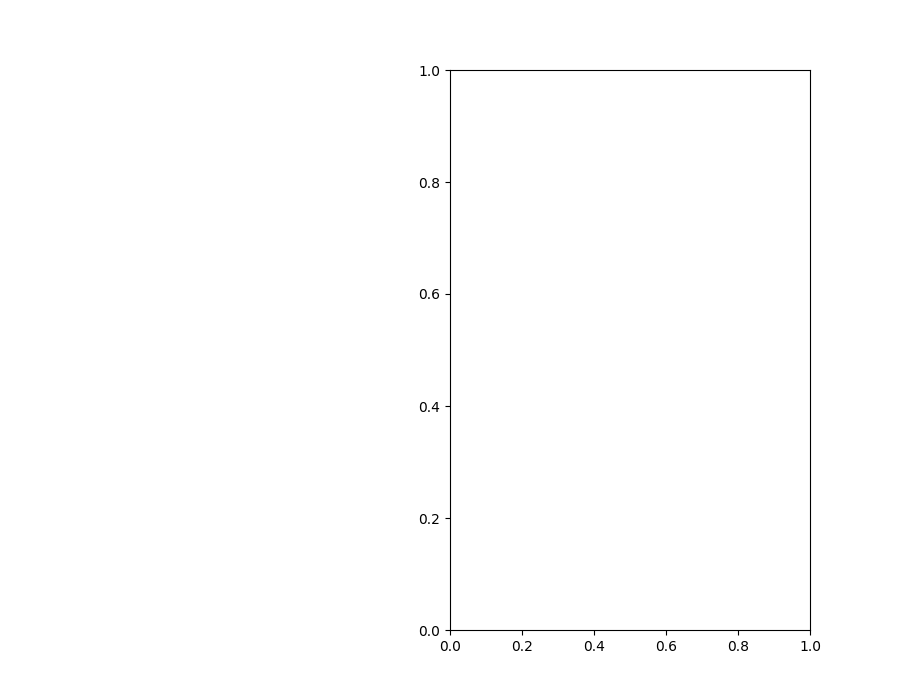

In [218]:
draw_stand()

interactive(children=(IntSlider(value=50, continuous_update=False, description='Отсечение:'), Dropdown(descrip…

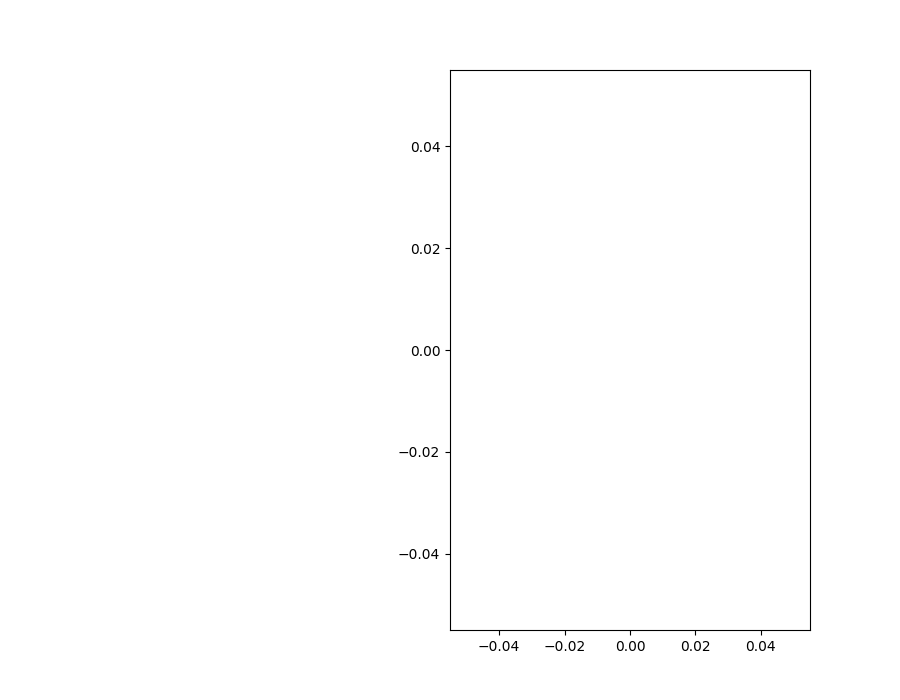

In [219]:
draw_range()